## Công thức mô tả bài toán LP


Phát biểu dạng bài toán cực tiểu hóa:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{min}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$

hoặc phát biểu dạng bài toán cực đại hóa:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{max}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$

#Bài toán đầu tư tài chính: lựa chọn danh mục đầu tư



*Tình huống:* Một công ty đầu tư dự định dùng khoản quỹ đầu tư $500.000$ triệu đồng để mua một số cổ phiếu trên thị trường chứng khoán. Công ty đưa ra các giới hạn trên của số tiền mua từng loại chứng khoán nhằm đa dạng hóa danh mục đầu tư để phòng ngừa rủi ro. Bảng dưới đây cho các số liệu về các giới hạn này cũng như lãi suất của các chứng khoán:
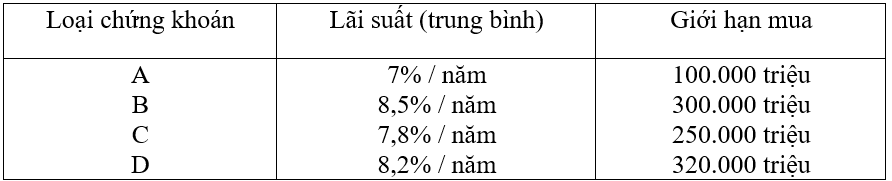
Ngoài ra, cũng để ngăn ngừa rủi ro trong đầu tư, công ty còn quy định khoản đầu tư vào loại cổ phiếu A và C phải chiếm ít nhất là 55%, loại cổ phiếu B phải chiếm ít nhất 15% trong tổng số tiền đầu tư thực hiện. Hãy xác định số tiền công ty sẽ mua từng loại cổ phiếu sao cho không vượt quá khoản dự kiến ban đầu, đảm bảo đòi hỏi về đa dạng hóa đồng thời đạt mức lãi cao nhất.


### Mô hình hóa bài toán lựa chọn danh mục đầu tư:

Xác định biến số:

$\mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right] $


trong đó $x_1, x_2, x_3, x_4$ lần lượt là số tiền đầu tư vào các loại chứng khoán A, B, C, D.

Diễn đạt bài toán thành công thức:

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{max}} \quad & 0,07x_1 + 0,085x_2 + 0,078x_3 + 0,082 x_4 \\
\text{subject to} \quad & x_1 + x_3 \ge 0,55 \left( x_1+x_2+x_3+x_4\right)\\
\quad & x_2 \ge 0,15 \left(x_1+x_2+x_3+x_4 \right)\\
\quad & x_1+x_2+x_3+x_4 \le 500000\\
\quad & 0 \le x_1 \le 100 000 \\
 \quad & 0 \le x_2 \le 300 000 \\
 \quad & 0 \le x_3 \le 250 000 \\
 \quad & 0 \le x_4 \le 320 000 \\
 \end{align}
$

## Lập trình Python để mô tả bài toán và giải

#### Using PuLP

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 34.9 MB/s eta 0:00:00


In [ ]:
import pulp

# Create the LP problem
prob = pulp.LpProblem("Investment_LP_Problem", pulp.LpMaximize)

# Define the decision variables
x1 = pulp.LpVariable("x1", lowBound=0)
# if x1 must be an integer: x1 = pulp.LpVariable("x1", lowBound=0, cat="Integer")
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)
x4 = pulp.LpVariable("x4", lowBound=0)
# Set the objective function
prob += 0.07*x1 + 0.085*x2 + 0.078*x3 + 0.082*x4

# Add constraints
prob += x1+x2+x3+x4<=500000
prob += x1+x3 >= 0.55*(x1+x2+x3+x4)
prob += x2 >= 0.15*(x1+x2+x3+x4)
prob += x1 <= 100000
prob += x2 <= 300000
prob += x3 <= 250000
prob += x4 <= 320000

# Solve the LP problem
status = prob.solve()

# Print the solution
print(f"Status: {pulp.LpStatus[status]}")
print(f"Optimal value: {pulp.value(prob.objective)}")
print(f"Optimal solution: x1 = {x1.varValue}, x2 = {x2.varValue}, x3 = {x3.varValue}, x4 = {x4.varValue}")


Status: Optimal
Optimal value: 40375.0
Optimal solution: x1 = 25000.0, x2 = 225000.0, x3 = 250000.0, x4 = 0.0


#### Using Pyomo

In [ ]:
# To install glpk solver:
#!apt install python3.9-dev libglpk-dev libgmp3-dev
#!pip3 install glpk
#!apt install glpk-utils
!apt-get install -y -qq glpk-utils
!pip install -q pyomo
import sys 
sys.path.append('~/.local/lib/python3.9/site-packages') # so that glpk path is included in path

from pyomo.environ import *

# Create the model
model = ConcreteModel()

# Define the decision variables
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)
model.x3 = Var(within=NonNegativeReals)
model.x4 = Var(within=NonNegativeReals)
# Define the objective function
model.obj = Objective(expr=0.07*model.x1 + 0.085*model.x2 +0.078*model.x3+0.082*model.x4, sense=maximize)

# Define the constraints
model.con1 = Constraint(expr=model.x1 <= 100000)
model.con2 = Constraint(expr=model.x2 <= 300000)
model.con3 = Constraint(expr=model.x3 <= 250000)
model.con4 = Constraint(expr=model.x4 <= 320000)
model.con5 = Constraint(expr=model.x1 + model.x3 >= 0.55*(model.x1+model.x2+model.x3+model.x4))
model.con6 = Constraint(expr=model.x2 >= 0.15*(model.x1+model.x2+model.x3+model.x4))
model.con7 = Constraint(expr=model.x1+model.x2+model.x3+model.x4 <= 500000)
# Solve the linear programming problem
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(model)

# Print the solution
print(f"Optimal value: {model.obj()}")
print(f"Optimal solution: x1 = {model.x1()}, x2 = {model.x2()} , x3 = {model.x3()}, x4 = {model.x4()}")


Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 129499 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-2_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-2) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-2_amd64.deb ...
Unpacking glpk-utils (4.65-2) ...
Setting up libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Setting up libamd2:amd64 (1:5.7.1+

#### Using Scipy

Ta dùng gói linprog trong thư viện scipy.optimize. **Lưu ý**: linprog quy ước giải bài toán cực tiểu hóa (minimize), nên khi ta muốn giải bài toán maximize thì khai báo là minimize số đối của nó.

$\begin{align}
\underset{\substack{\mathbf{x}}}{\mathrm{min}} \quad & \mathrm{c}^T \mathbf{x} \\
\text{subject to} \quad & \mathrm{A}_{\text{eq}}\mathbf{x} = \mathrm{b}_{\text{eq}} \\
 & \mathrm{A}_{\text{ineq}}\mathbf{x} \le \mathrm{b}_{\text{ineq}}
 \end{align}
$


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Define the objective function
c = [-0.07, -0.085, -0.078, -0.082]

# Define the inequality constraints
Aineq = [[1, 0,0,0], [0, 1,0,0],[0,0,1,0], [0,0,0,1], [-0.45,0.55,-0.45,0.55], [0.15,-0.85,0.15,0.15], [1,1,1,1]]
bineq = [100000, 300000, 250000, 320000, 0,0,500000]

# Define the bounds on the variables
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
# Solve the linear programming problem
res = linprog(c, A_ub=Aineq, b_ub=bineq, bounds=[x1_bounds, x2_bounds, x3_bounds, x4_bounds],
             options={"disp": True})


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 0.685               -                1.0                 -0.315              
0.2260013051051     0.226001305102      0.1548350784871     0.7854803241791  0.2260013051176     -1.107545219122     
0.0103096388442     0.01030963884371    0.007062513841155   0.9639534151512  0.0103096388456     -29.41529844846     
2.716717534731e-06  2.716717534123e-06  1.864486758651e-06  0.9997373998526  2.716717537109e-06  -24720.03879347     
4.169034868839e-07  4.169034867905e-07  2.861214023486e-07  0.8562452750184  4.169034872488e-07  -37058.11268975     
2.176465141201e-07  2.176465140725e-07  1.493710842237e-07  0.5173116152444  2.176465143117e-07  -32371.05974046     
4.798584315144e-08  4.798584314095e-08  3.293274630778e-08  0.8060524988668  4.798584319369e-08  -38884.44761202     
7.155207632133e-09  7.155207630566e-09  4.910628292887e-0

In [ ]:

# Print the solution
print(f"Optimal value: {res.fun}")
print(f"Optimal solution: x1 = {res.x[0]}, x2 = {res.x[1]}, x3 = {res.x[2]}, x4 = {res.x[3]}")


Optimal value: -40374.99999989524
Optimal solution: x1 = 25000.00000389173, x2 = 224999.9999910644, x3 = 249999.999997441, x4 = 7.096906834312347e-06


In [ ]:
res

     con: array([], dtype=float64)
     fun: -40374.99999989524
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([7.50000000e+04, 7.50000000e+04, 2.55901250e-06, 3.20000000e+05,
       1.61099888e-06, 1.50000000e+05, 5.05940989e-07])
  status: 0
 success: True
       x: array([2.50000000e+04, 2.25000000e+05, 2.50000000e+05, 7.09690683e-06])

Bài tập 4

In [ ]:
#BT4
import numpy as np
from scipy.optimize import linprog

# Define the objective function
c = [30, 28, 25, 20]

# Define the inequality constraints
Aineq = [[30, 28,-25,-20], [1,0,1,0],[0,1,0,1]]
bineq = [0, 32, 20]
# Define the bounds on the variables
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
# Solve the linear programming problem
res = linprog(c, A_ub=Aineq, b_ub=bineq, bounds=[x1_bounds, x2_bounds, x3_bounds, x4_bounds],
             options={"disp": True})


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 103.0               
0.09232407348083    0.09232407348083    0.09232407348083    0.9089551189459  0.09232407348083    72.18217716688      
0.01141766227012    0.01141766227012    0.01141766227012    0.8810315003634  0.01141766227012    18.72675095822      
0.0003002399570828  0.0003002399570827  0.0003002399570827  0.9815912712821  0.0003002399570827  0.6121967433685     
1.588082100525e-08  1.588082100626e-08  1.588082099198e-08  0.999947106948   1.588082099199e-08  3.110703174814e-05  
7.940794705748e-13  7.940400999969e-13  7.94041049973e-13   0.99995          7.940410499732e-13  1.555351999428e-09  
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 5


In [ ]:
# Print the solution
print(f"Optimal value: {res.fun}")
print(f"Optimal solution: x1 = {res.x[0]}, x2 = {res.x[1]}, x3 = {res.x[2]}, x4 = {res.x[3]}")

Optimal value: 1.5553519994278311e-09
Optimal solution: x1 = 2.589793573077354e-11, x2 = 3.5595988457806584e-12, x3 = 1.412544003498067e-11, x4 = 1.6280457947412497e-11


BÀI TẬP 8

In [6]:
#BT8a
import numpy as np
from scipy.optimize import linprog

# Define the objective function
c = [0, 8, 6, 6,9,7,5,4,6]

# Define the inequality constraints
Aineq = [[1,1,1,0,0,0,0,0,0], [0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1], [1,0,0,1,0,0,1,0,0],[0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,0,1]]
bineq = [25,25,40,30,20,40]
# Define the bounds on the variables
#xij is the area of land type i planted with rice of type j
x11_bounds = (0, None)
x12_bounds = (0, None)
x13_bounds = (0, None)
x21_bounds = (0, None)
x22_bounds = (0, None)
x23_bounds = (0, None)
x31_bounds = (0, None)
x32_bounds = (0, None)
x33_bounds = (0, None)
# Solve the linear programming problem
res = linprog(c, A_ub=Aineq, b_ub=bineq, bounds=[x11_bounds, x12_bounds, x13_bounds, x21_bounds, x22_bounds, x23_bounds, x31_bounds, x32_bounds, x33_bounds],
             options={"disp": True})


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 51.0                
0.2037831164238     0.2037831164238     0.2037831164238     0.80361201382    0.2037831164238     104.1648518212      
0.04451340217382    0.04451340217383    0.04451340217383    0.799523108672   0.04451340217383    51.81952020881      
0.0007435529862617  0.0007435529862666  0.0007435529862665  0.9854543265754  0.0007435529862666  0.4367011325074     
4.180539729322e-08  4.180539722723e-08  4.180539722848e-08  0.9999445779908  4.180539722825e-08  2.899481822626e-05  
2.090313649314e-12  2.090250863083e-12  2.090269862513e-12  0.99995          2.090269862492e-12  1.449741322677e-09  
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 5


In [7]:
# Print the solution
print(f"Optimal value: {res.fun}")
print(f"Optimal solution: x11 = {res.x[0]}, x12 = {res.x[1]}, x13 = {res.x[2]}, x21 = {res.x[3]}, x22 = {res.x[4]}, x23={res.x[5]}, x31={res.x[6]}, x32={res.x[7]}, x33={res.x[8]}")

Optimal value: 1.4497413226766953e-09
Optimal solution: x11 = 13.69122867196573, x12 = 4.2343325608469095e-11, x13 = 5.5554783950142206e-11, x21 = 2.536242044908559e-11, x22 = 2.601248437485357e-11, x23=3.2633218920044875e-11, x31=1.367979737321091e-11, x32=1.8118877380958459e-12, x33=1.4550010296856945e-11


In [8]:
#BT8b
import numpy as np
from scipy.optimize import linprog

# Define the objective function
c = [0, 8, 6, 6,9,7,5,4,6]

# Define the inequality constraints
Aineq = [[0,1,1,0,0,0,0,0,0], [0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1], [0,0,0,1,0,0,1,0,0],[0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,0,1]]
bineq = [25,25,40,30,20,40]
# Define the bounds on the variables
#xij is the area of land type i planted with rice of type j
x11_bounds = (0, None)
x12_bounds = (0, None)
x13_bounds = (0, None)
x21_bounds = (0, None)
x22_bounds = (0, None)
x23_bounds = (0, None)
x31_bounds = (0, None)
x32_bounds = (0, None)
x33_bounds = (0, None)
# Solve the linear programming problem
res = linprog(c, A_ub=Aineq, b_ub=bineq, bounds=[x11_bounds, x12_bounds, x13_bounds, x21_bounds, x22_bounds, x23_bounds, x31_bounds, x32_bounds, x33_bounds],
             options={"disp": True})


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 51.0                
0.1847474358039     0.1847474358039     0.1847474358039     0.8199453675174  0.1847474358039     115.8330208934      
0.03349750601173    0.03349750601173    0.03349750601173    0.8365901029675  0.03349750601173    51.12382214977      
0.0004619759214833  0.000461975921483   0.0004619759214829  0.989796347559   0.0004619759214829  0.1692883965404     
2.550545502047e-08  2.55054550407e-08   2.55054550403e-08   0.9999449492307  2.55054550404e-08   1.165832376121e-05  
1.275243251469e-12  1.275283893491e-12  1.275272752291e-12  0.99995          1.275272752299e-12  5.829162788144e-10  
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 5


In [9]:
# Print the solution
print(f"Optimal value: {res.fun}")
print(f"Optimal solution: x11 = {res.x[0]}, x12 = {res.x[1]}, x13 = {res.x[2]}, x21 = {res.x[3]}, x22 = {res.x[4]}, x23={res.x[5]}, x31={res.x[6]}, x32={res.x[7]}, x33={res.x[8]}")

Optimal value: 5.829162788143619e-10
Optimal solution: x11 = 15.466666666546784, x12 = 1.2842949681556379e-11, x13 = 1.155171281113585e-11, x21 = 1.0301952825686692e-11, x22 = 1.0710985264116535e-11, x23=1.0329503922746141e-11, x31=1.935444428279198e-11, x32=7.334102986177947e-13, x33=1.3439905016045461e-11
